# The emerging of COVID-19 Delta Variants in the United States

### **Context**

In recent weeks, covid-19 cases in the US have been increasing. turning back up from its declining trend since the beginning of 2021. It was probably caused by the new coronavirus variants, commonly known as the delta variant that already spreading in other countries and known to spread more contagiously compared to the previously known variants[1]. 

### **Objective**

The objective of this project is to take an early look at current vaccination efforts in the US and their impact on holding the spread of the new delta variants. Even though many people are already vaccinated, CDC states that vaccinated people might also carry this variant. This might cause an infection increase especially in an area with a low vaccination rate. We will see where the cases are currently surging, and we will compare it with the vaccination rate to see if there is a sign of the correlation between vaccination rate and cases increases. 


### **Research Questions**
1. What is the current vaccination rate and new cases rate in the United States?
2. How the correlation between vaccination rate and new cases?
3. What are the trends of the new cases age group?

Knowing this hopefully will help the planning for mitigation efforts, such as: 
- Prioritize county and state to enforcing vaccination or mask mandate to slow the spread of the new covid-19 variant
- Formulating policy and taking action based on the age group trends 

(e.g.: targeting vaccination to certain age group, closing schools for teens or offices for adults age group)

--------------------

### **The Datasets**
- Vaccination Case Rate | CDC [2]
- Covid-19 Case Surveillance - Public Use Data | CDC [3]

### **Data Processing**
The list of data processing that have been done including:
- Replacing NaN value
- Replacing State abbreviation
- Converting object type data into float
- Grouping county data into state data
- Dropping na value
- Merging data
- Converting date string into datetime format 
- Filtering data based on certain month and year


### **Analytical Task**

We will process data from CDC Data Tracker. The first data is the vaccination case rate [2]. The tasks are: 

- Pre-process the data to see which states have the highest and lowest proportion of vaccinated population & new cases

- Use simple plotting **sns.pairplot()** and correlation analysis **corr()** to see the relationships between vaccination rate and new cases in the past 7 days.

After learning the correlation and impacted states we also want to take a look at the age group of the newest cases using Covid-19 Case-Surveillance data provided by CDC [3].

- Finding is the distribution of age group demographic for new variants.

- Use graphic bar **plt.barh()** to see if recent cases are concentrated into certain vulnerable age group

----------------------------


[1] https://www.nytimes.com/2021/07/30/health/covid-cdc-delta-masks.html

[2] https://covid.cdc.gov/covid-data-tracker/#vaccination-case-rate

[3] https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf


### Import library

In [4]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import os
from datetime import datetime, timedelta
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

### Load the data and check its type

In [5]:
#load vaccination and case data from 30 July 2021
county_vac_df = pd.DataFrame(pd.read_csv('county_vaccination.csv')) 

In [6]:
#check total county
len(county_vac_df)

3219

In [7]:
#check the types of data
county_vac_df.dtypes

County                                        object
State                                         object
Cases - last 7 days per 100k                  object
% total pop fully vaccinated                 float64
Vaccination county reporting completeness    float64
Data as of date                               object
dtype: object

In [8]:
#view the cases column, why it has object type
county_vac_df['Cases - last 7 days per 100k']

0           152.14
1           453.34
2           162.04
3           281.33
4           181.58
           ...    
3214         77.96
3215          0.00
3216    suppressed
3217         30.98
3218         68.50
Name: Cases - last 7 days per 100k, Length: 3219, dtype: object

In [9]:
#found suppressed data. Replace suprresed value with numpy NaN.
county_vac_df = county_vac_df.replace('suppressed', np.nan)

In [10]:
#convert cases data from object to float, to get describe value
county_vac_df['Cases - last 7 days per 100k'] = county_vac_df['Cases - last 7 days per 100k'].astype(float)

In [11]:
county_vac_df['Cases - last 7 days per 100k'].describe()

count    2581.000000
mean      174.129609
std       168.690979
min         0.000000
25%        61.260000
50%       129.230000
75%       230.250000
max      2072.290000
Name: Cases - last 7 days per 100k, dtype: float64

In [12]:
#group the cases data based on states

#sum of county cases by states
states_case_df = county_vac_df.groupby('State')['Cases - last 7 days per 100k'].sum()

#the mean of %vaccinated by states
states_vaccinated_df = county_vac_df.groupby('State')['% total pop fully vaccinated'].mean()

#merge the cases and vaccinated population
states_case_vac_df = pd.merge(states_case_df,states_vaccinated_df, on=['State'])

In [13]:
states_case_vac_df

,Cases - last 7 days per 100k,% total pop fully vaccinated
State,,
AK,5652.68,51.467857
AL,11832.99,28.873134
AR,29905.65,29.889333
AZ,1960.56,46.713333
CA,7395.79,47.046000
CO,4344.53,31.950000
CT,488.47,61.275000
DC,60.22,51.800000
DE,195.89,48.833333


In [14]:
#drop state with NaN value (HI & TX)
states_case_vac_df = states_case_vac_df.dropna()

In [15]:
#check for correlation
states_case_vac_df.corr()

,Cases - last 7 days per 100k,% total pop fully vaccinated
Cases - last 7 days per 100k,1.0000,-0.5268
% total pop fully vaccinated,-0.5268,1.0000


It can be seen that there is negative correlation meaning it is moving the opposite. The higher the case, the lower the vaccinated proportion and vice versa.

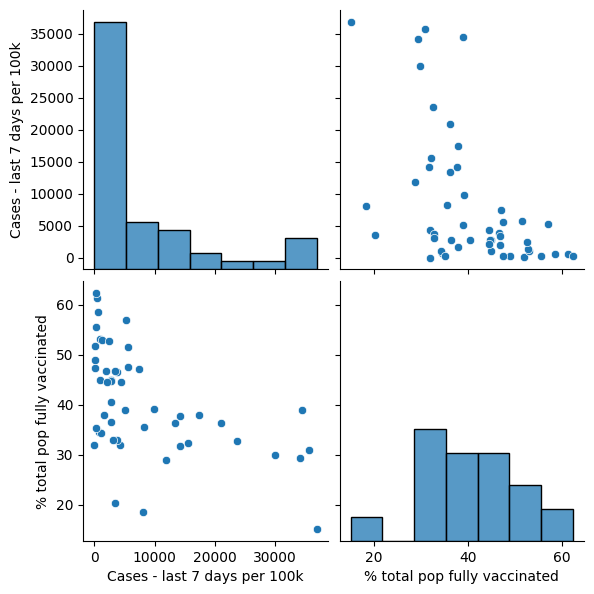

In [16]:
#draw the plot
sns.pairplot(states_case_vac_df, height=3)

## How the correlation between vaccination rate and new cases?
It seems that the states, where the percentage of total population is fully vaccinated below 50% have the higher case. There is another factor, that the current data only shows the percentage of the total population fully vaccinated (meaning two doses of shot, or 1 for J&J). Counting those partially vaccinated people might change the correlation value. Some counties are not reporting their cases. It might impact the correlation between those two variables.

In [17]:
#the highest case - % vaccinated states
print('the highest case - % vaccinated states')
print(states_case_vac_df.dropna().sort_values(by=['Cases - last 7 days per 100k']).tail(5))

print('\n')

print('the lowest case - % vaccinated states \n')
#the lowest case - % vaccinated states
print(states_case_vac_df.dropna().sort_values(by=['Cases - last 7 days per 100k']).head(5))

the highest case - % vaccinated states
       Cases - last 7 days per 100k  % total pop fully vaccinated
State                                                            
AR                         29905.65                     29.889333
MO                         34171.94                     29.369565
FL                         34471.25                     38.986567
LA                         35671.77                     30.976562
GA                         36887.33                     15.121384


the lowest case - % vaccinated states 

       Cases - last 7 days per 100k  % total pop fully vaccinated
State                                                            
NE                             0.00                     31.854839
DC                            60.22                     51.800000
VT                           187.63                     47.385714
DE                           195.89                     48.833333
NH                           267.22                     55.44

The state name is still in abbreviation, the next step is to replace it to make it easier to read

In [19]:
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

In [20]:
#rename the index 
states_case_vac_df =  states_case_vac_df.rename(index=us_state_abbrev)

In [21]:
states_case_vac_df.describe()

,Cases - last 7 days per 100k,% total pop fully vaccinated
count,50.000000,50.000000
mean,8204.358400,40.583759
std,10434.280569,10.609653
min,0.000000,15.121384
25%,1149.735000,32.891008
50%,3610.505000,38.940443
75%,11331.822500,47.300786
max,36887.330000,62.300000


In [22]:
#the highest case - % vaccinated states
print('the highest case - % vaccinated states')
print(states_case_vac_df.dropna().sort_values(by=['Cases - last 7 days per 100k']).tail(5))

print('\n')

print('the lowest case - % vaccinated states \n')
#the lowest case - % vaccinated states
print(states_case_vac_df.dropna().sort_values(by=['Cases - last 7 days per 100k']).head(5))

the highest case - % vaccinated states
           Cases - last 7 days per 100k  % total pop fully vaccinated
State                                                                
Arkansas                       29905.65                     29.889333
Missouri                       34171.94                     29.369565
Florida                        34471.25                     38.986567
Louisiana                      35671.77                     30.976562
Georgia                        36887.33                     15.121384


the lowest case - % vaccinated states 

               Cases - last 7 days per 100k  % total pop fully vaccinated
State                                                                    
Nebraska                               0.00                     31.854839
DC                                    60.22                     51.800000
Vermont                              187.63                     47.385714
Delaware                             195.89                

## What is the current vaccination rate and new cases rate in the United States?

Georgia has the highest case with a low proportion of the vaccinated population at 15%. The other has below 40% of the vaccinated population. For the lowest case, the percentage of the vaccinated population is closing to 50% and above. With exception of Nebraska which seems reported zero cases,  probably due to data unavailability.

### Checking age group trends for new cases
After we see the vaccination impact, we want to check new cases age group. To see if this new spikes are concentrating on certain age group. We will take a look on detailed case data taken from CDC 30 July 2021

In [23]:
#load cases
covid_case_2_df = pd.DataFrame(pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')) 

In [24]:
#check na data from the table
covid_case_2_df.isna().sum()

cdc_case_earliest_dt             0
cdc_report_dt               312833
pos_spec_dt                3372022
onset_dt                   2086362
current_status                   4
sex                              8
age_group                        8
race_ethnicity_combined          8
hosp_yn                          4
icu_yn                           5
death_yn                         5
medcond_yn                       5
dtype: int64

In [25]:
#checking the age group sum
covid_case_2_df['age_group'].value_counts()

10 - 19 Years    994337
50 - 59 Years    877357
20 - 29 Years    683218
60 - 69 Years    553195
40 - 49 Years    547525
30 - 39 Years    487040
0 - 9 Years      131734
70 - 79 Years     95298
Missing           81097
80+ Years         76181
Name: age_group, dtype: int64

In [26]:
covid_case_2_df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/10/23,2020/10/23,2020/10/23,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/09/16,2020/09/25,NaN,2020/09/16,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2021/03/26,2021/03/27,NaN,2021/03/26,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
3,2020/06/24,2020/07/02,NaN,2020/06/24,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
4,2020/07/18,2020/07/25,NaN,2020/07/18,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
4526985,2021/01/19,2021/02/23,2021/01/19,NaN,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",Missi{,NaN,NaN,NaN
4526986,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4526987,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4526988,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
covid_case_2_df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [28]:
#remove nan value from date table
covid_case_2_df = covid_case_2_df[covid_case_2_df['cdc_report_dt'].notna()]

In [29]:
covid_case_2_df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/10/23,2020/10/23,2020/10/23,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/09/16,2020/09/25,NaN,2020/09/16,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2021/03/26,2021/03/27,NaN,2021/03/26,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
3,2020/06/24,2020/07/02,NaN,2020/06/24,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
4,2020/07/18,2020/07/25,NaN,2020/07/18,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
4526981,2020/12/12,2020/12/17,NaN,2020/12/12,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
4526982,2021/01/19,2021/01/19,2021/01/19,NaN,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown
4526983,2020/12/31,2021/01/05,NaN,2020/12/31,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing
4526984,2021/01/09,2021/02/23,2021/01/09,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing


In [30]:
covid_case_2_df.columns

Index(['cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [31]:
#convert date string into datetime
covid_case_2_df['cdc_case_earliest_dt '] = [datetime.strptime(date, "%Y/%m/%d") for date in covid_case_2_df['cdc_case_earliest_dt ']]

#create new columns for month and year
covid_case_2_df['month'] = [date.month for date in covid_case_2_df['cdc_case_earliest_dt ']]
covid_case_2_df['year'] = [date.year for date in covid_case_2_df['cdc_case_earliest_dt ']]

C:\Users\hanfiev\AppData\Local\Temp/ipykernel_12400/364984672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_case_2_df['cdc_case_earliest_dt '] = [datetime.strptime(date, "%Y/%m/%d") for date in covid_case_2_df['cdc_case_earliest_dt ']]
C:\Users\hanfiev\AppData\Local\Temp/ipykernel_12400/364984672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_case_2_df['month'] = [date.month for date in covid_case_2_df['cdc_case_earliest_dt ']]
C:\Users\hanfiev\AppData\Local\Temp/ipykernel_12400/36498

In [32]:
covid_case_2_df

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,month,year
0,2020-10-23,2020/10/23,2020/10/23,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,10,2020
1,2020-09-16,2020/09/25,NaN,2020/09/16,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,9,2020
2,2021-03-26,2021/03/27,NaN,2021/03/26,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,3,2021
3,2020-06-24,2020/07/02,NaN,2020/06/24,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing,6,2020
4,2020-07-18,2020/07/25,NaN,2020/07/18,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526981,2020-12-12,2020/12/17,NaN,2020/12/12,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing,12,2020
4526982,2021-01-19,2021/01/19,2021/01/19,NaN,Probable Case,Male,30 - 39 Years,"White, Non-Hispanic",Unknown,Unknown,No,Unknown,1,2021
4526983,2020-12-31,2021/01/05,NaN,2020/12/31,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing,12,2020
4526984,2021-01-09,2021/02/23,2021/01/09,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,No,Missing,1,2021


## What are the trends of the new cases age group?

I want to check the demographic trends, especially for the age group data. I tried to focus on the cases that happened in the last three months. It is where the number of cases is starting to rise again.

In [33]:
#we want to check the trend for the last 3 months for new kind of infections

year_list = [2021]
month_list = [5,6,7]

filtered_month = covid_case_2_df['month'].isin(month_list)
filtered_year = covid_case_2_df['year'].isin(year_list)

In [34]:
#create new table based on filtered month and year
filtered_case = covid_case_2_df[filtered_month & filtered_year]

In [35]:
filtered_case

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,month,year
39,2021-05-07,2021/05/11,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing,5,2021
61,2021-06-26,2021/06/28,NaN,2021/06/26,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,6,2021
62,2021-06-29,2021/07/01,NaN,2021/06/29,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,6,2021
63,2021-06-13,2021/06/13,NaN,2021/06/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing,6,2021
68,2021-05-01,2021/05/02,NaN,2021/05/01,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526883,2021-05-20,2021/05/20,2021/05/20,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,Missing,No,5,2021
4526891,2021-05-06,2021/05/06,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing,5,2021
4526895,2021-05-21,2021/07/08,NaN,2021/05/21,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing,5,2021
4526954,2021-06-13,2021/06/17,NaN,2021/06/13,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing,6,2021


Text(0, 0.5, 'Age Group')

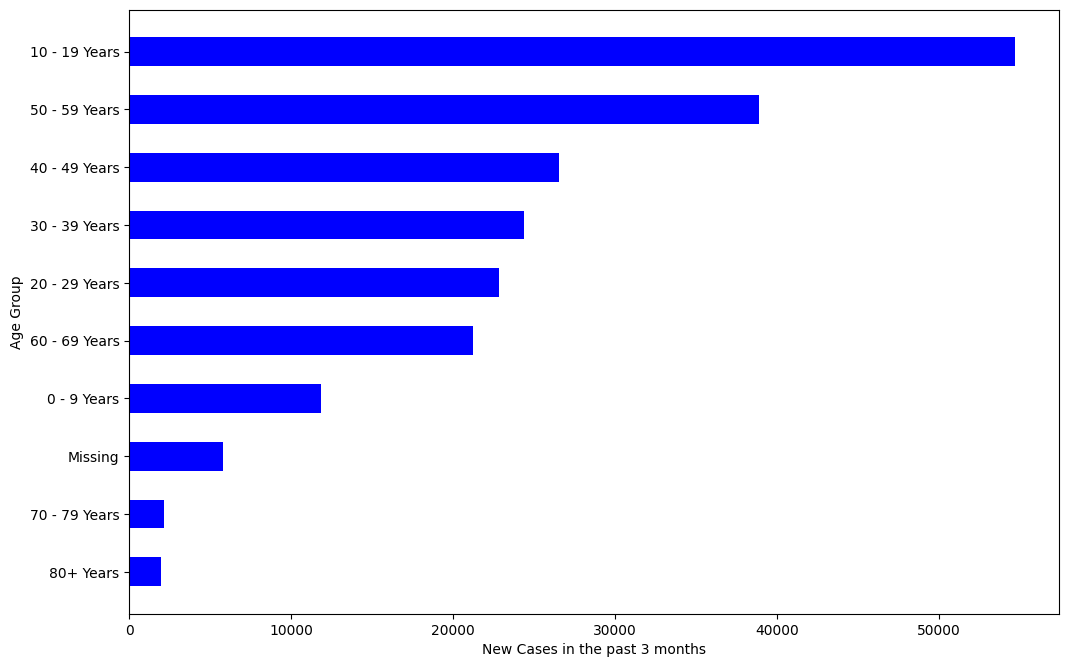

In [36]:
#draw a bar chart for age group cases
age_count = filtered_case['age_group'].value_counts(ascending=True)

plt.barh(age_count.index,age_count,color='blue',height=0.5)
plt.xlabel('New Cases in the past 3 months')
plt.ylabel('Age Group')

### Notes
It seems that the youngest age group is vulnerable to this new variant. This trend is also being reported by the New York Times and The Atlantic that there is a shift in the trends of those hospitalized from the beginning of pandemic. It is changing from older patients (above 50 years old) to younger patients.

News reported as of 11 August 2021:

https://www.nytimes.com/live/2021/08/03/world/covid-delta-variant-vaccine/doctors-say-unvaccinated-young-adults-are-becoming-more-severely-ill-and-more-quickly

https://www.theatlantic.com/health/archive/2021/08/delta-variant-covid-children/619712/

https://www.bloomberg.com/news/articles/2021-08-03/apathetic-u-s-youth-shrug-off-vaccines-as-delta-variant-spreads

The action that can be taken is to prioritize vaccination and social distancing enforcement in this age group in the low vaccinated area.